In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [7]:
# From Covid Tracking API
# https://covidtracking.com/api/
# Getting sporadic 403 errors when attempting to read URLs directly
# in Pandas so downloading files locally first
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

f_us = 'data/api_us.json'
f_states = 'data/api_states.json'

f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [8]:
r = requests.get(api_us, allow_redirects=True)
open(f_us, 'wb').write(r.content)

r = requests.get(api_states, allow_redirects=True)
open(f_states, 'wb').write(r.content)

109274

In [9]:
df_us = pd.read_json(f_us)
df_states = pd.read_json(f_states)
df_pop = pd.read_csv(f_pop)

In [10]:
df_us.shape

(17, 8)

In [11]:
df_states.shape

(813, 8)

In [12]:
df_us.tail()

,date,states,positive,negative,posNeg,pending,death,total
12,20200316,56,4019,36104,40123,1691,71.0,41714
13,20200317,56,5723,47604,53327,1687,90.0,54957
14,20200318,56,7731,66225,73956,2538,112.0,76495
15,20200319,56,11723,89119,100842,3025,160.0,103867
16,20200320,56,17038,118147,135185,3336,219.0,138521


In [13]:
df_states.tail()

,date,state,positive,negative,pending,death,total,dateChecked
808,20200304,OR,3,29.0,18.0,NaN,50,2020-03-04T21:00:00Z
809,20200304,SC,0,5.0,0.0,NaN,5,2020-03-04T21:00:00Z
810,20200304,TX,1,NaN,NaN,NaN,1,2020-03-04T21:00:00Z
811,20200304,WA,39,NaN,NaN,NaN,39,2020-03-04T21:00:00Z
812,20200304,WI,1,19.0,6.0,NaN,26,2020-03-04T21:00:00Z


In [14]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [15]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [16]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

In [17]:
df_states.tail()

,date,state,positive,negative,pending,death,total,dateChecked,state_name,geo_id,population,pop_density,pos_by_pop
788,2020-03-11,WY,0,NaN,NaN,NaN,0,2020-03-11T20:00:00Z,Wyoming,56,577737,5.950611,0.0
789,2020-03-10,WY,0,0.0,0.0,NaN,0,2020-03-10T20:00:00Z,Wyoming,56,577737,5.950611,0.0
790,2020-03-09,WY,0,NaN,NaN,NaN,0,2020-03-09T20:00:00Z,Wyoming,56,577737,5.950611,0.0
791,2020-03-08,WY,0,NaN,NaN,NaN,0,2020-03-08T20:00:00Z,Wyoming,56,577737,5.950611,0.0
792,2020-03-07,WY,0,NaN,NaN,NaN,0,2020-03-07T21:00:00Z,Wyoming,56,577737,5.950611,0.0


# United States Positive Cases

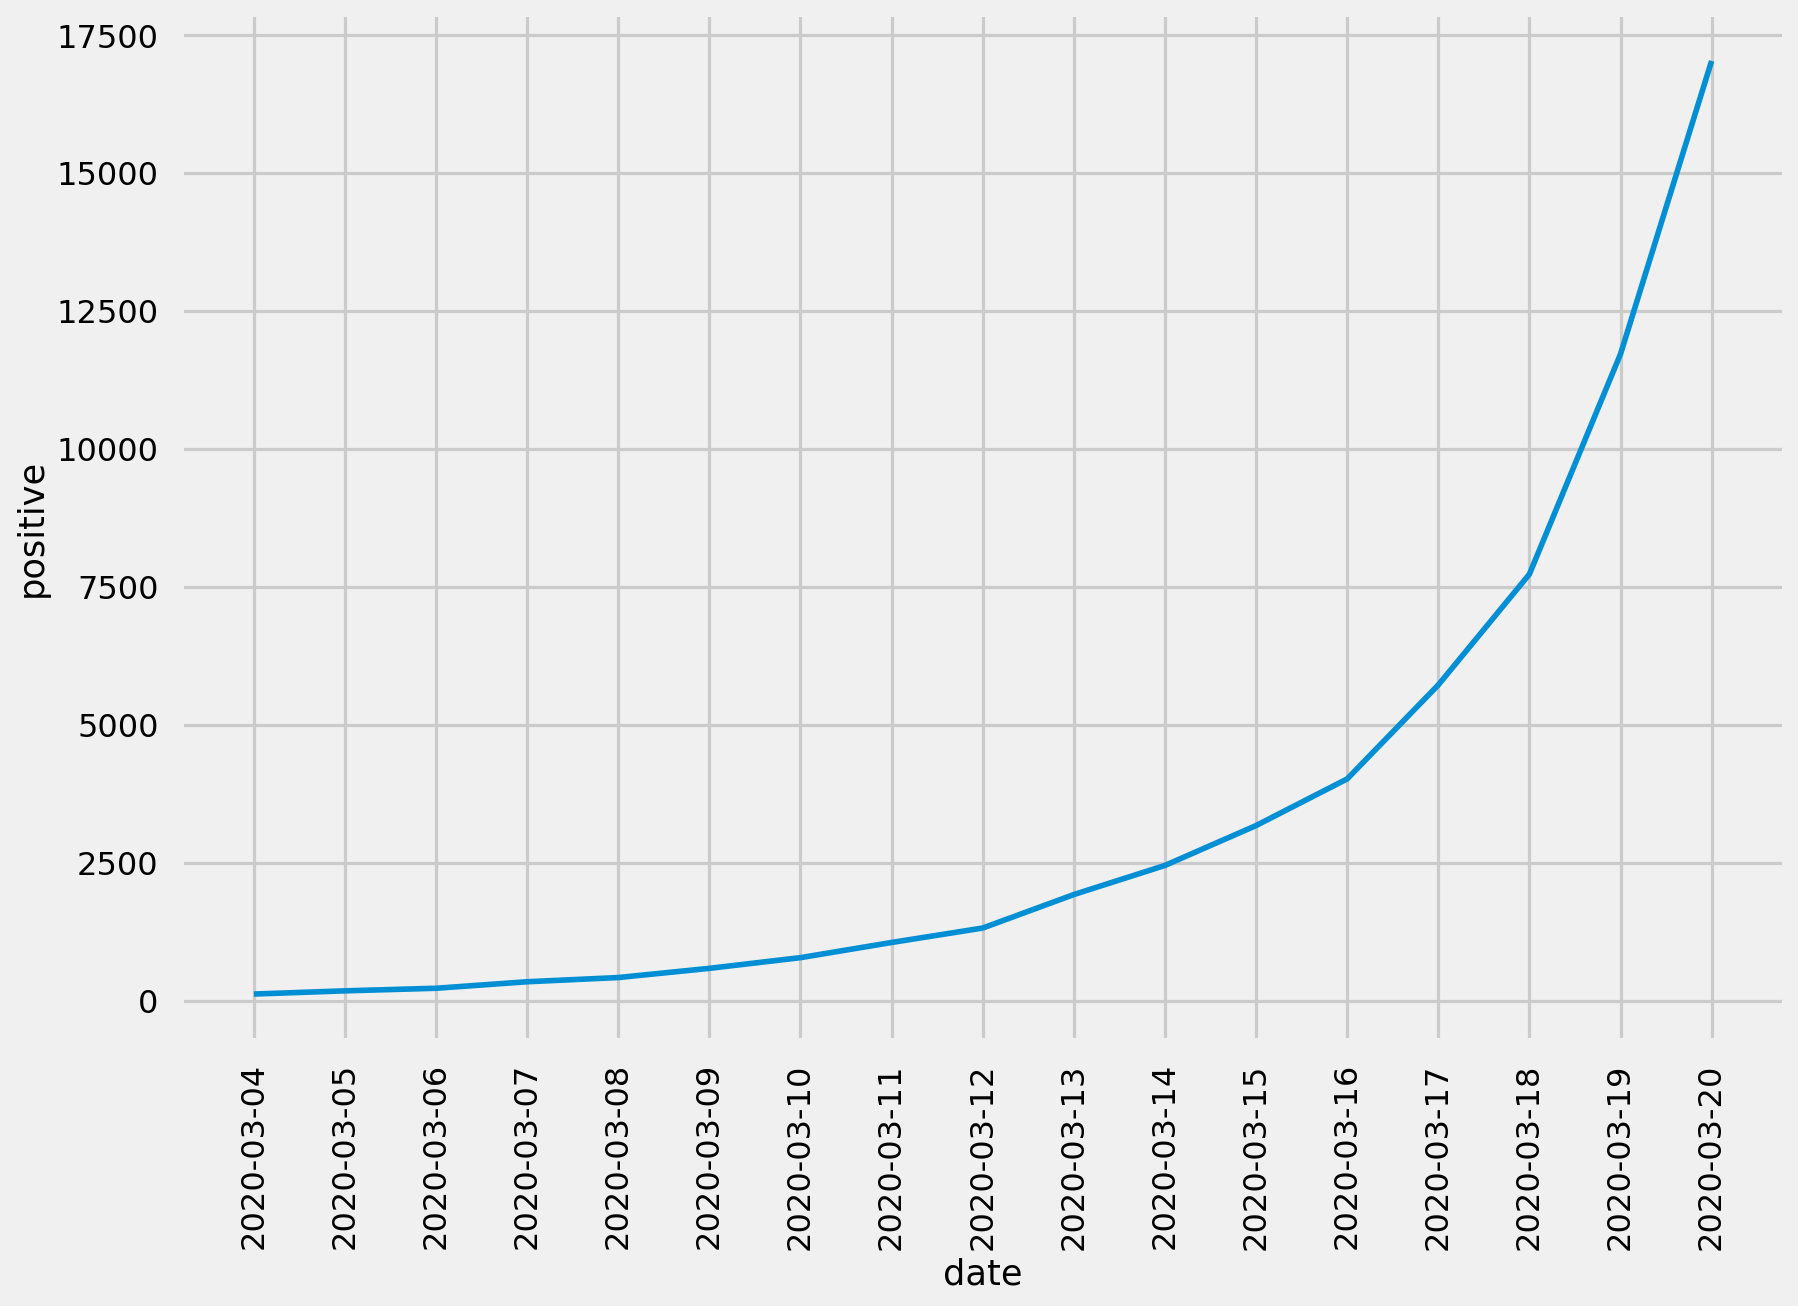

In [18]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

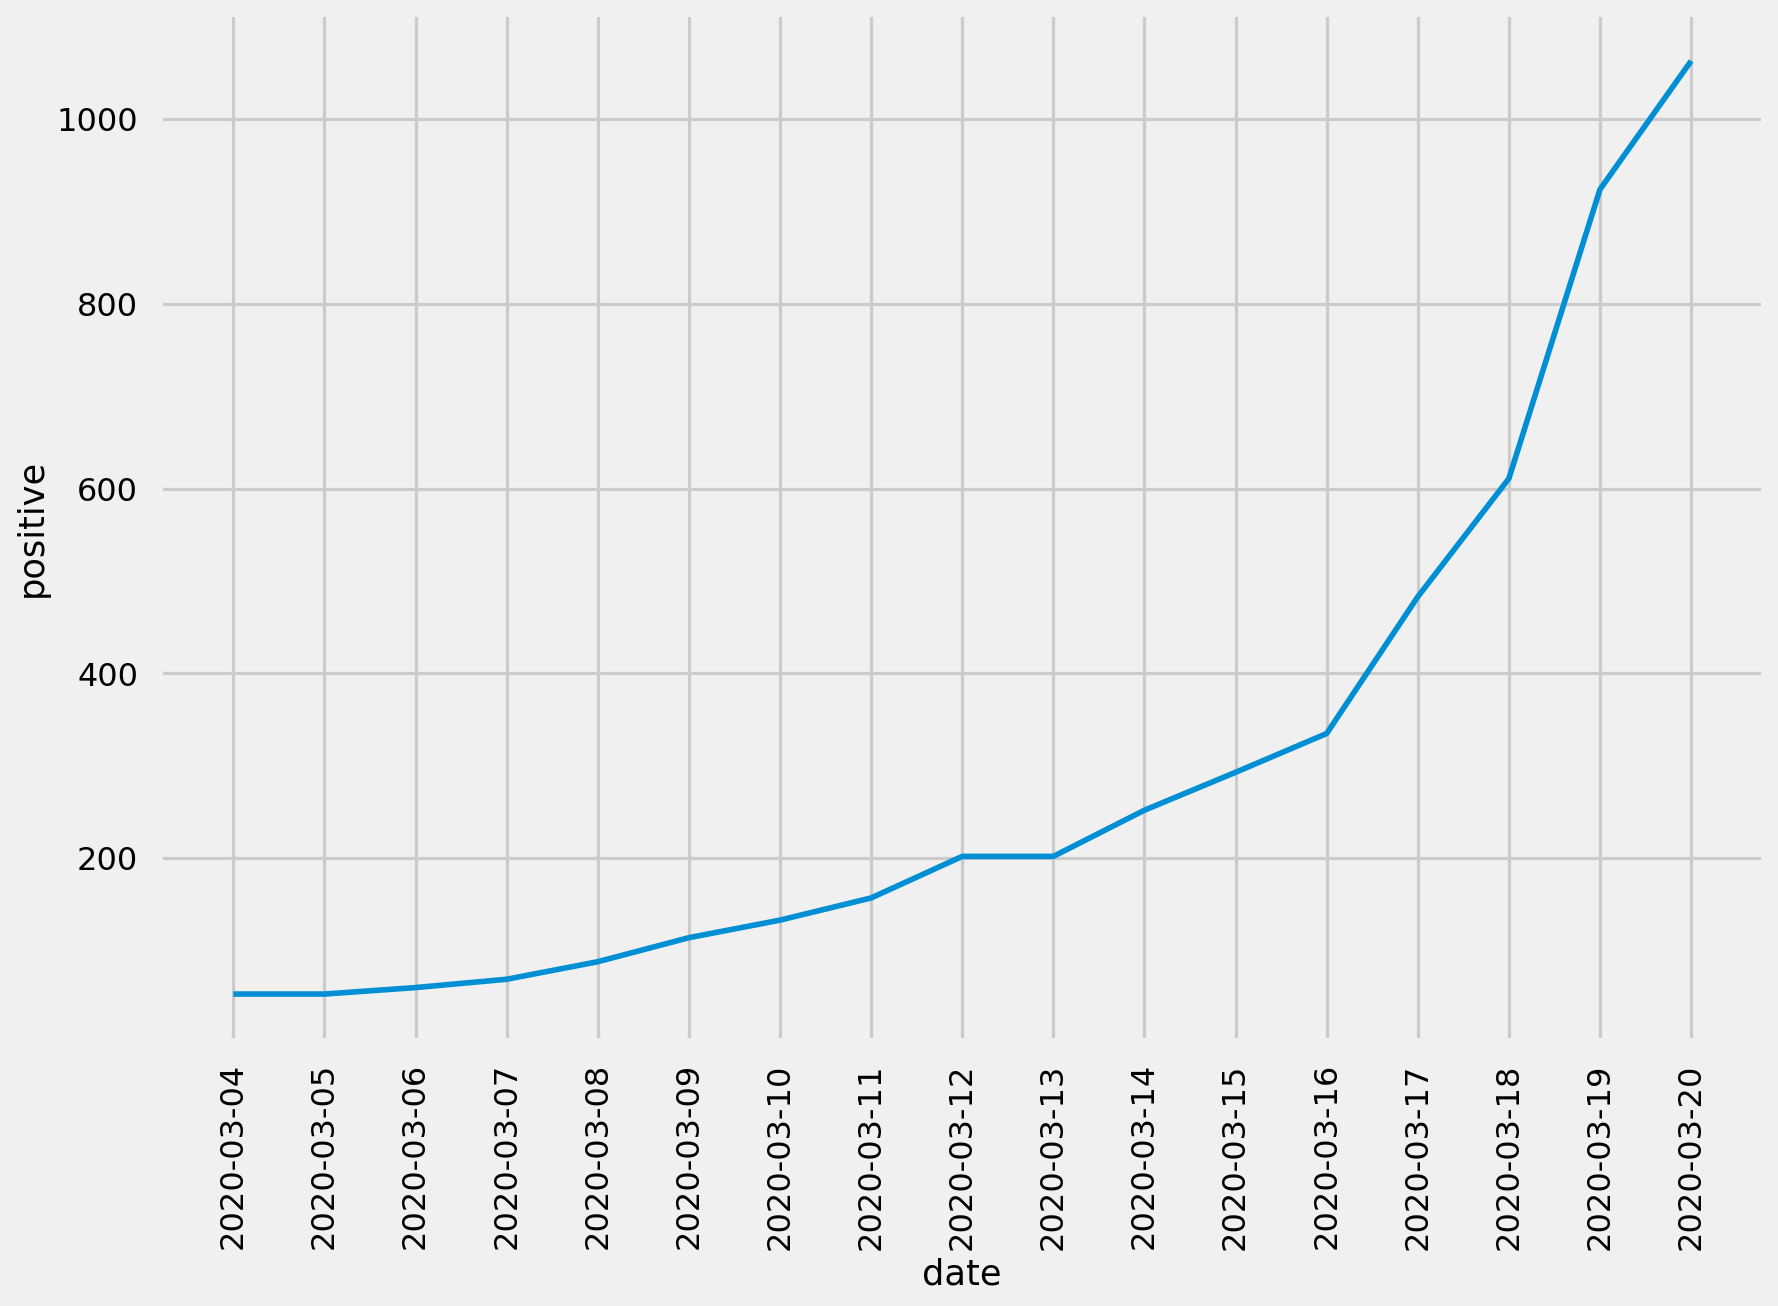

In [19]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

# All States Positive Cases

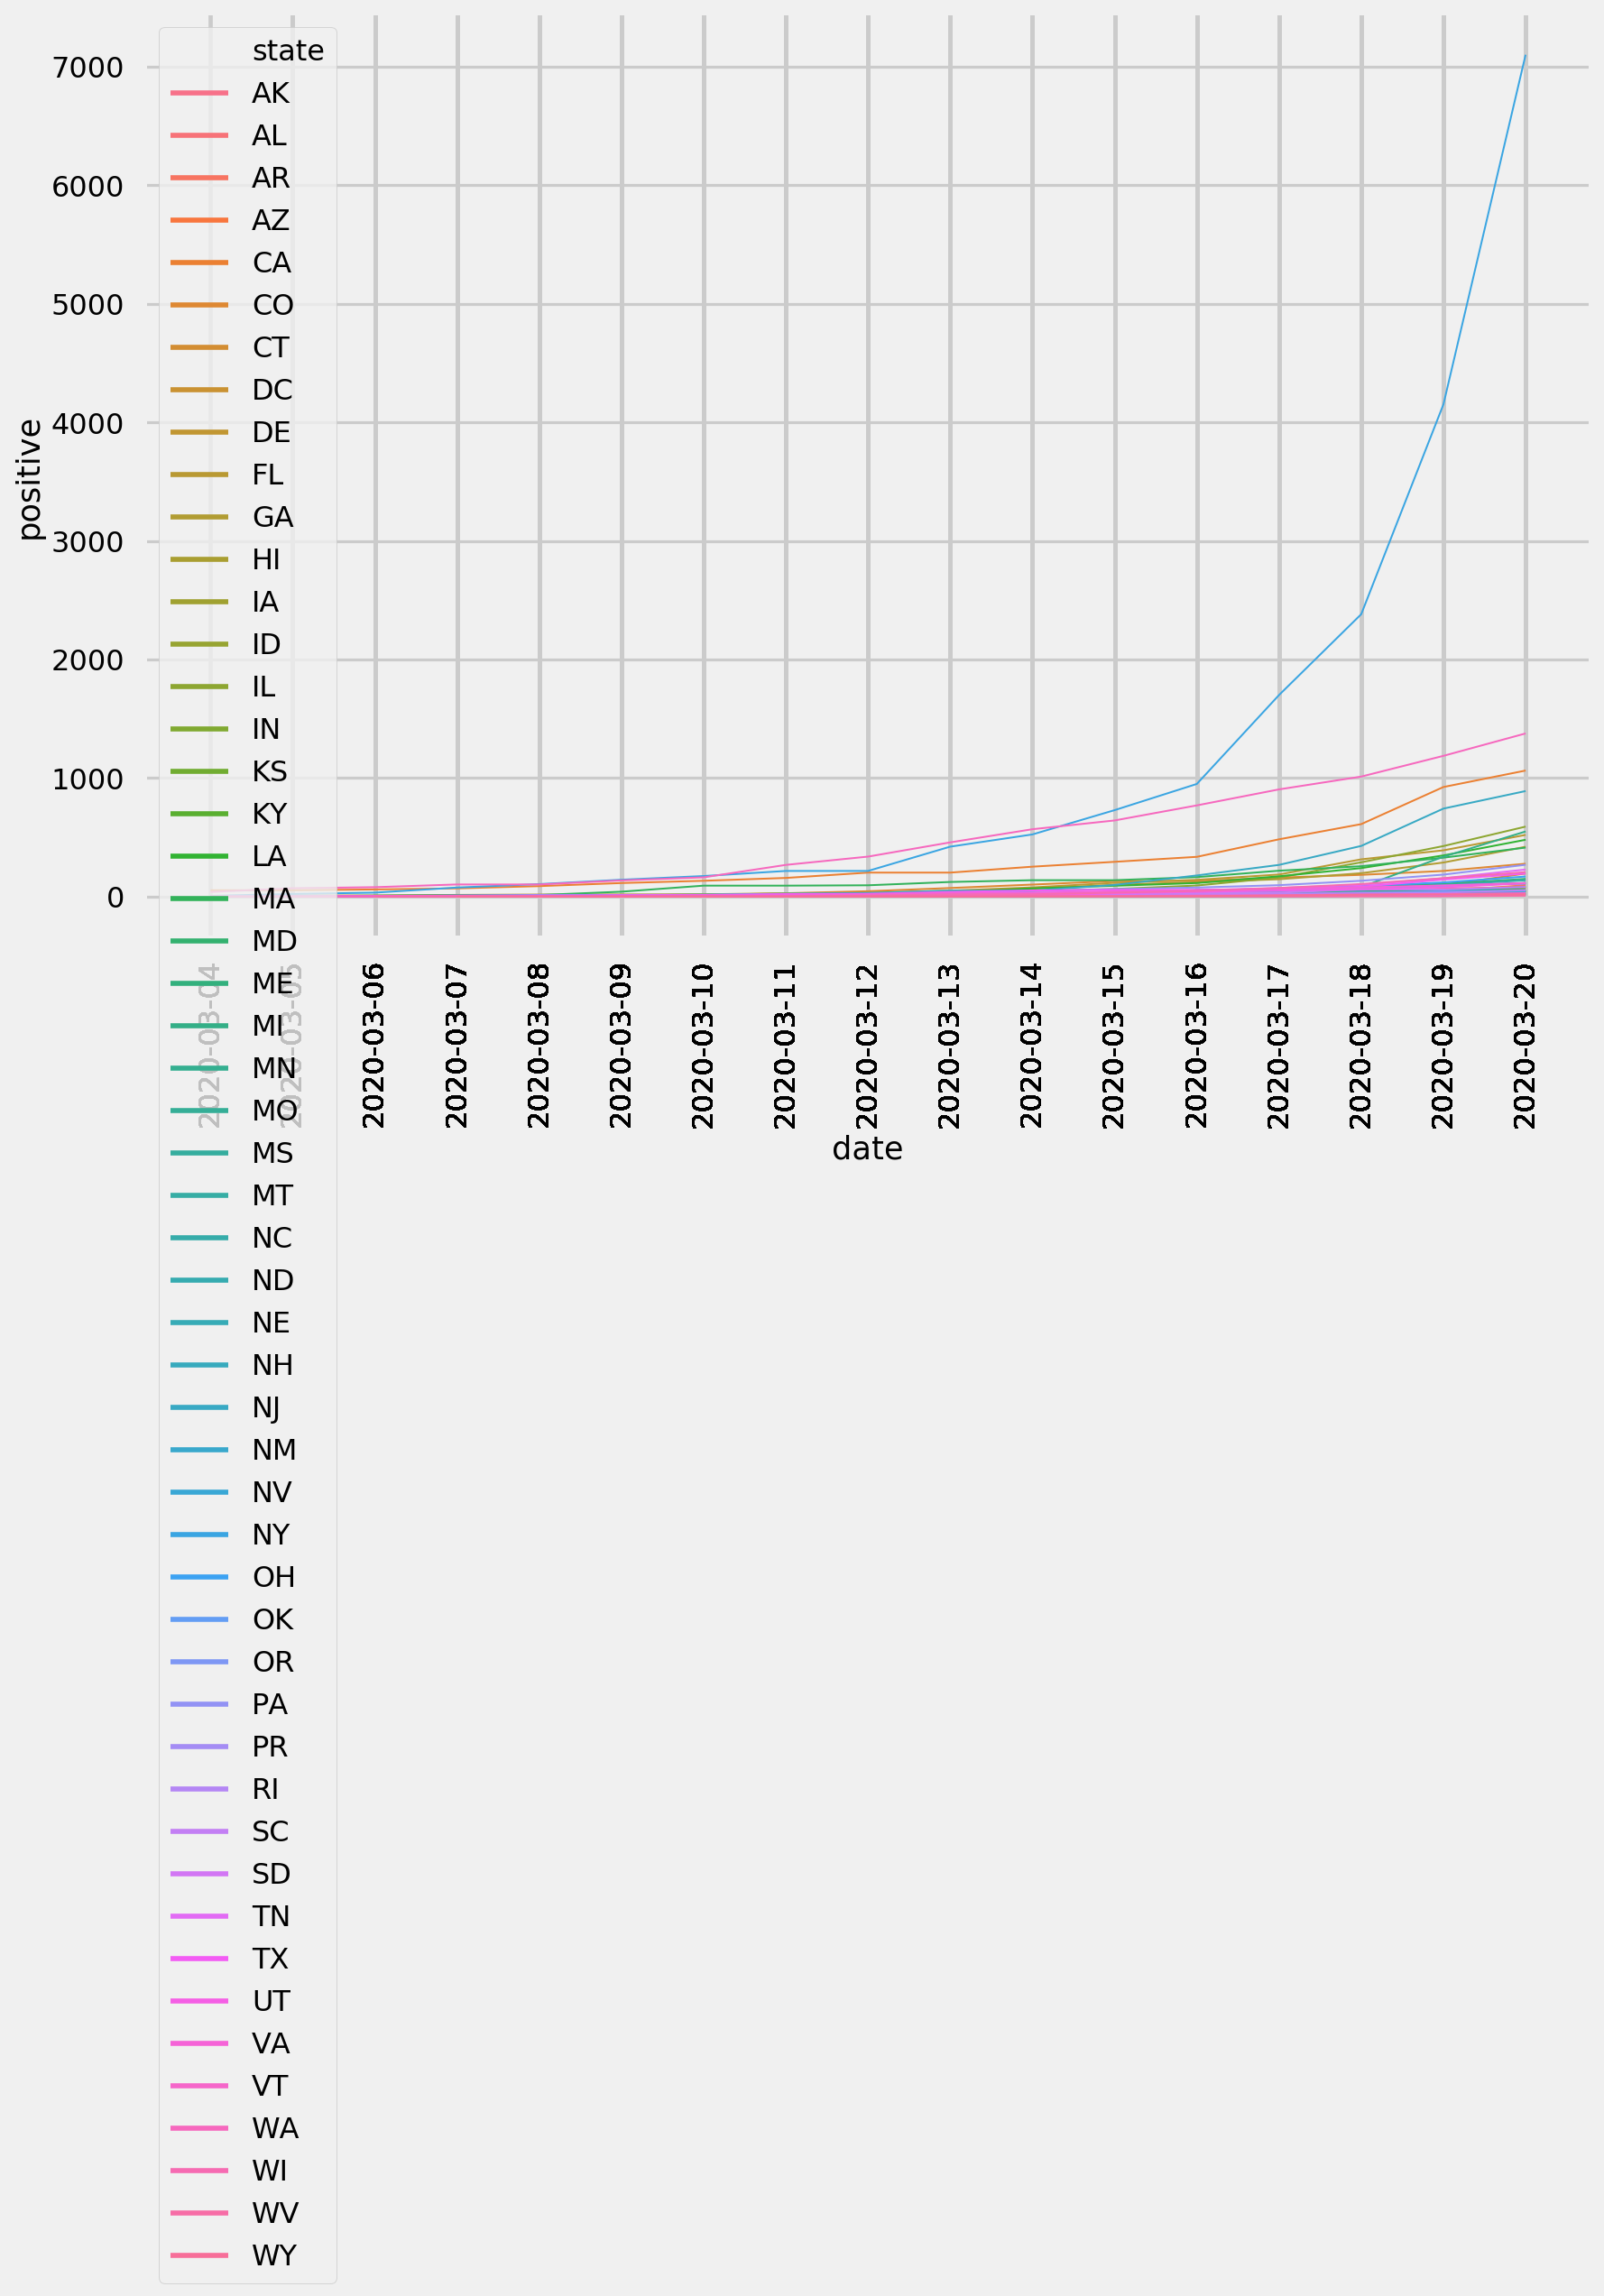

In [20]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_states)
ax.set(xticks=df_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top 10 States

In [21]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'WA', 'CA', 'NJ', 'IL', 'MI', 'FL', 'LA', 'GA', 'MA']

# Top State Positive Cases

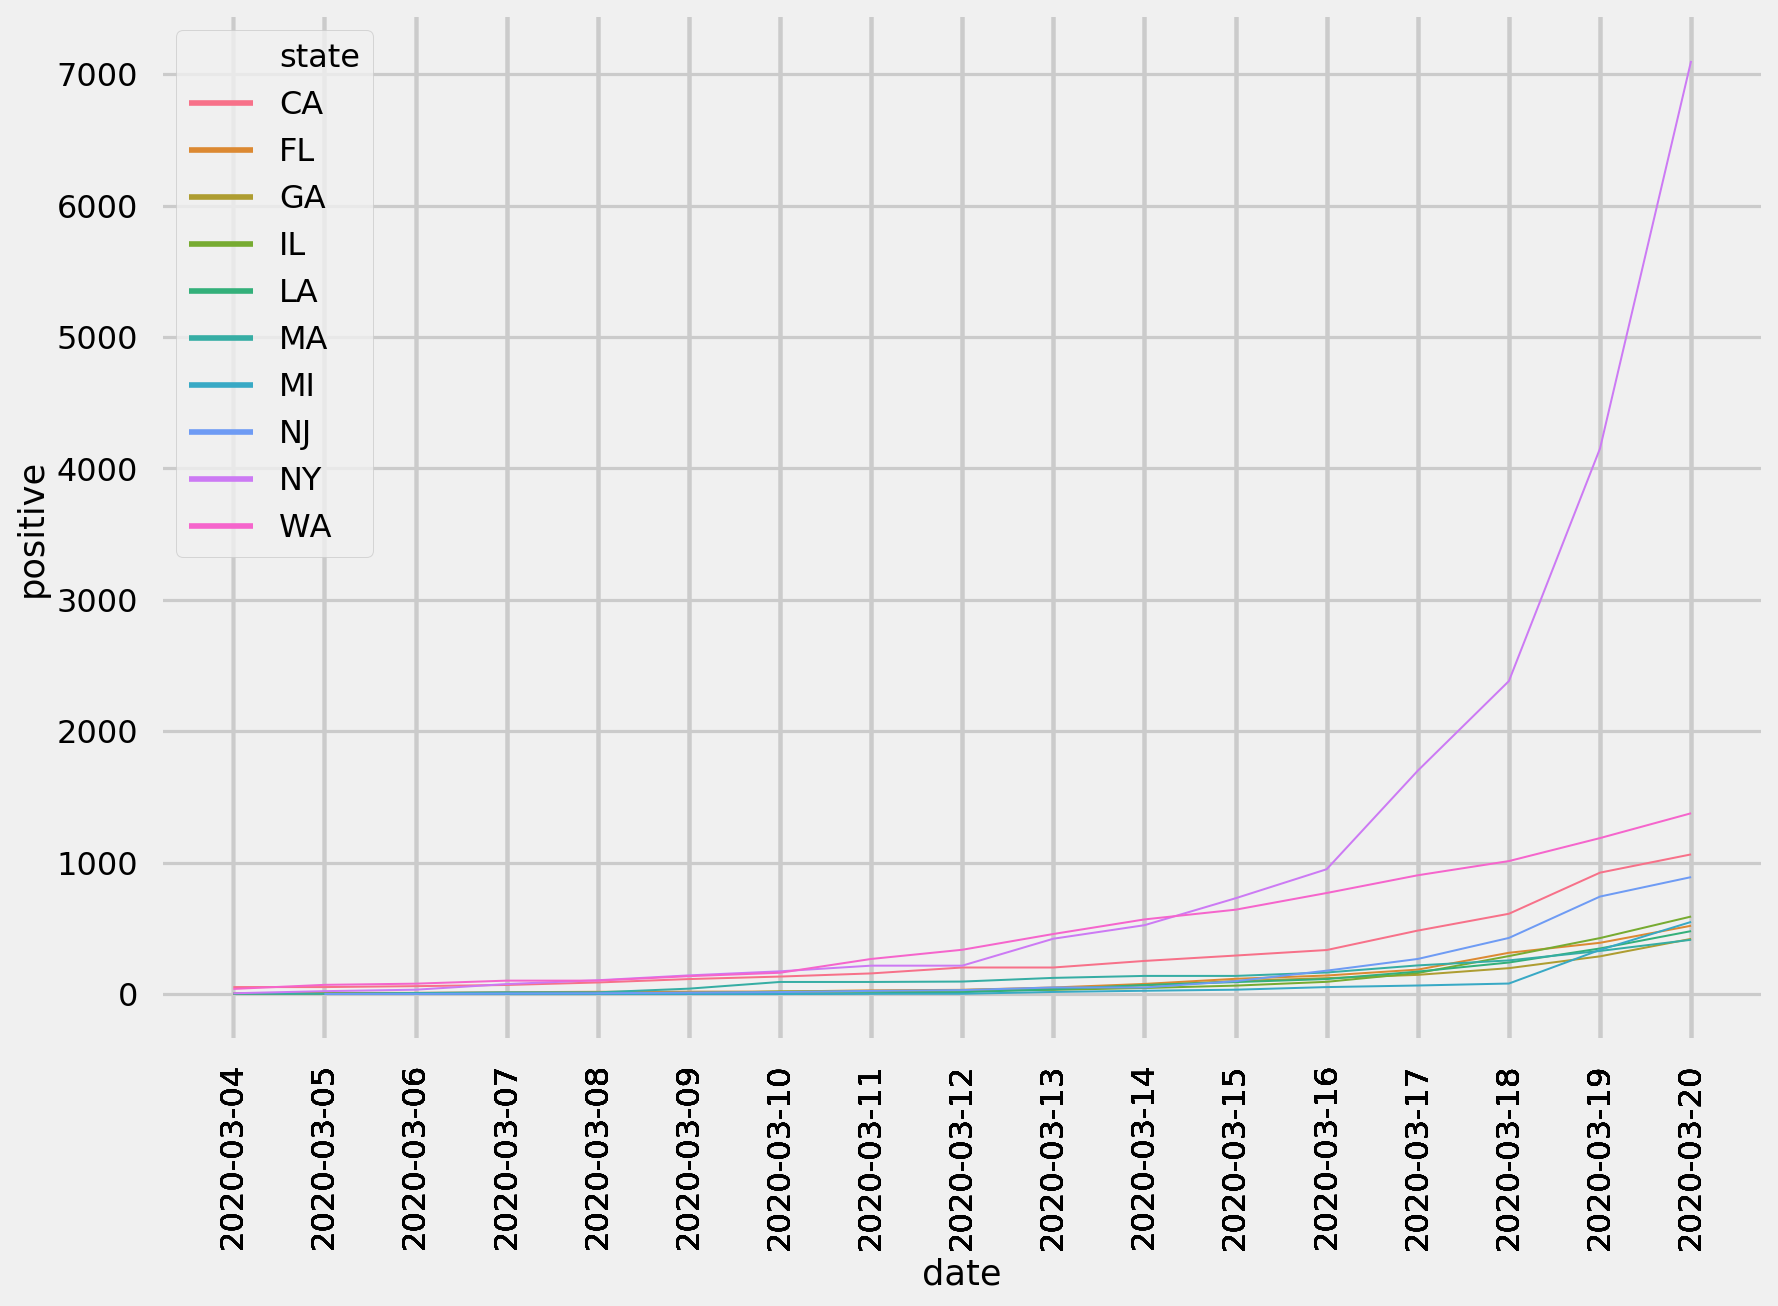

In [22]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases (Log Scale)

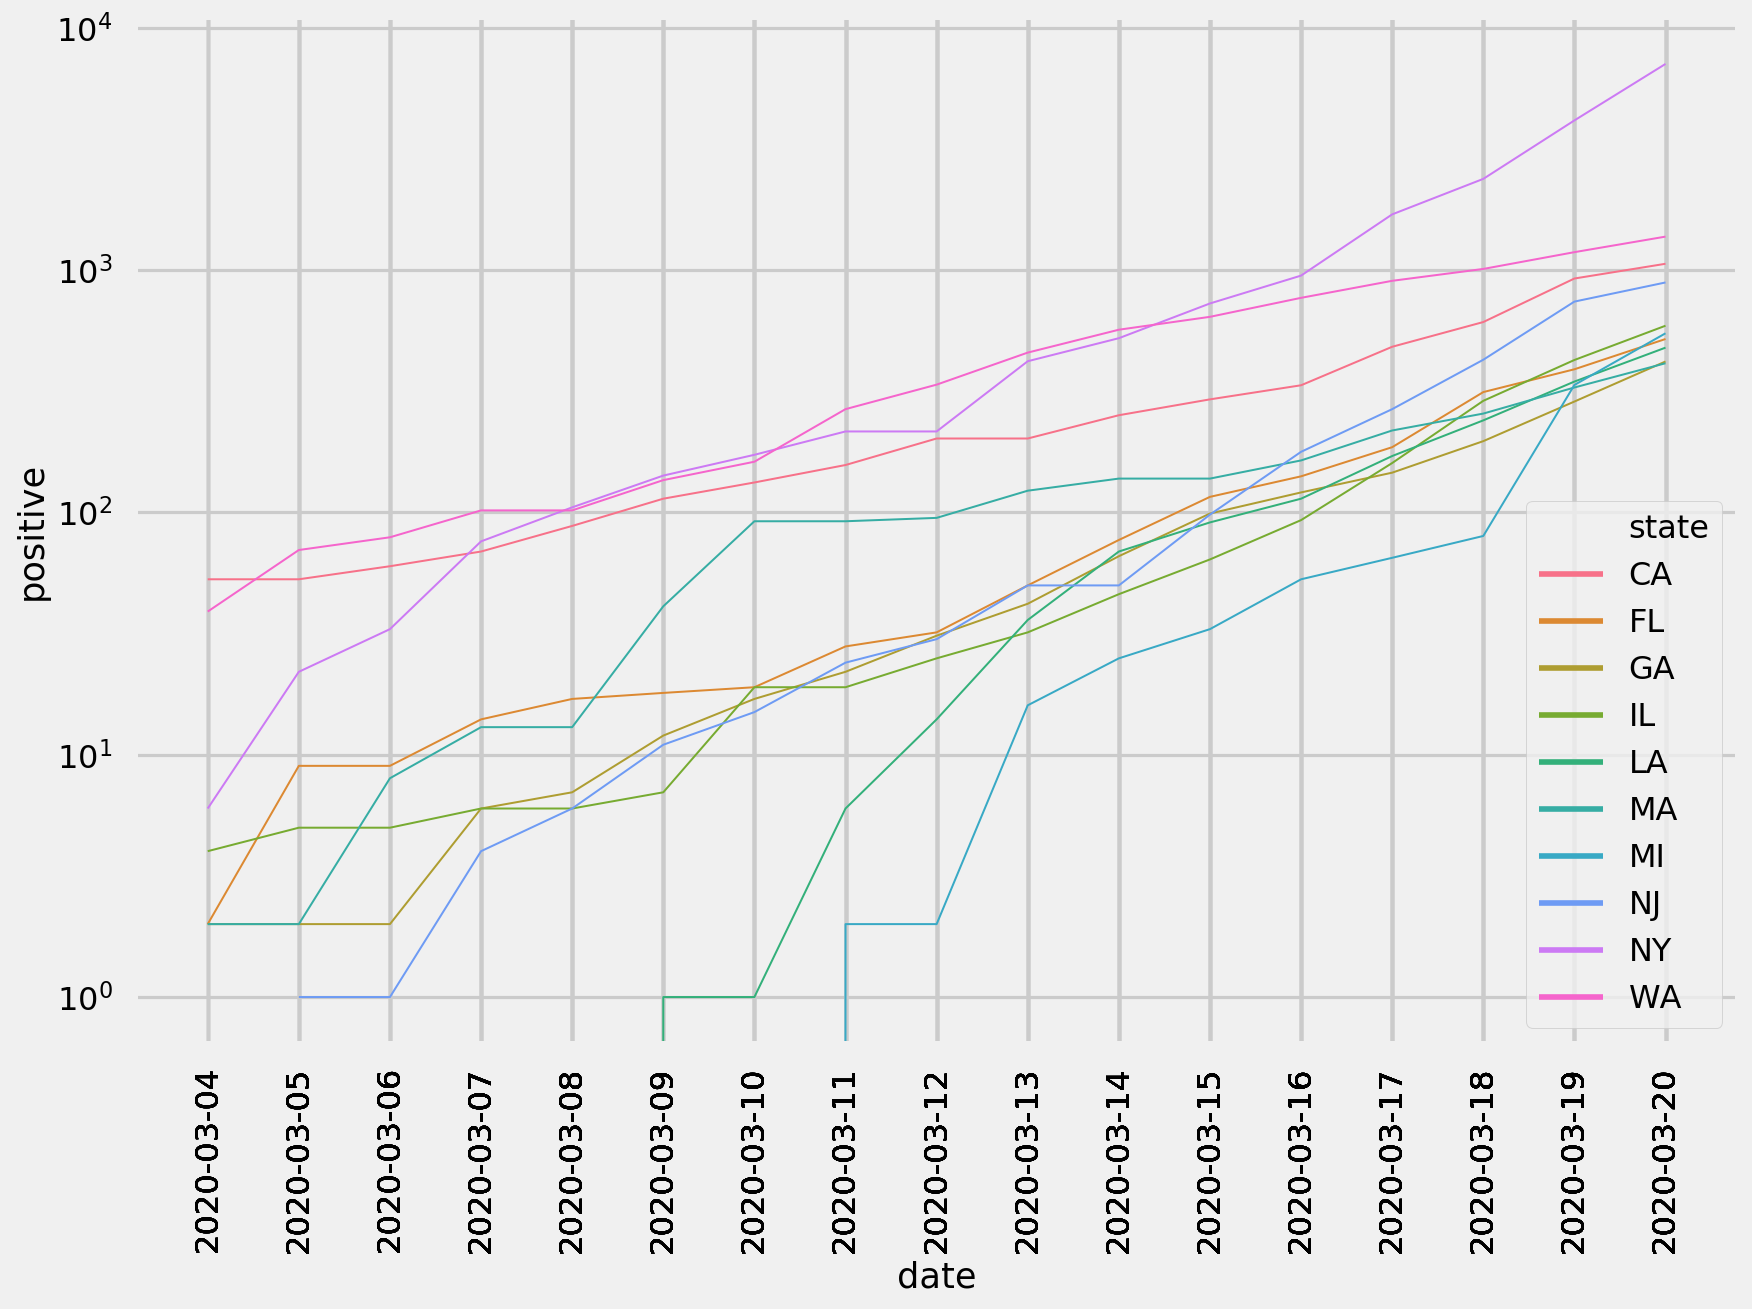

In [23]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population

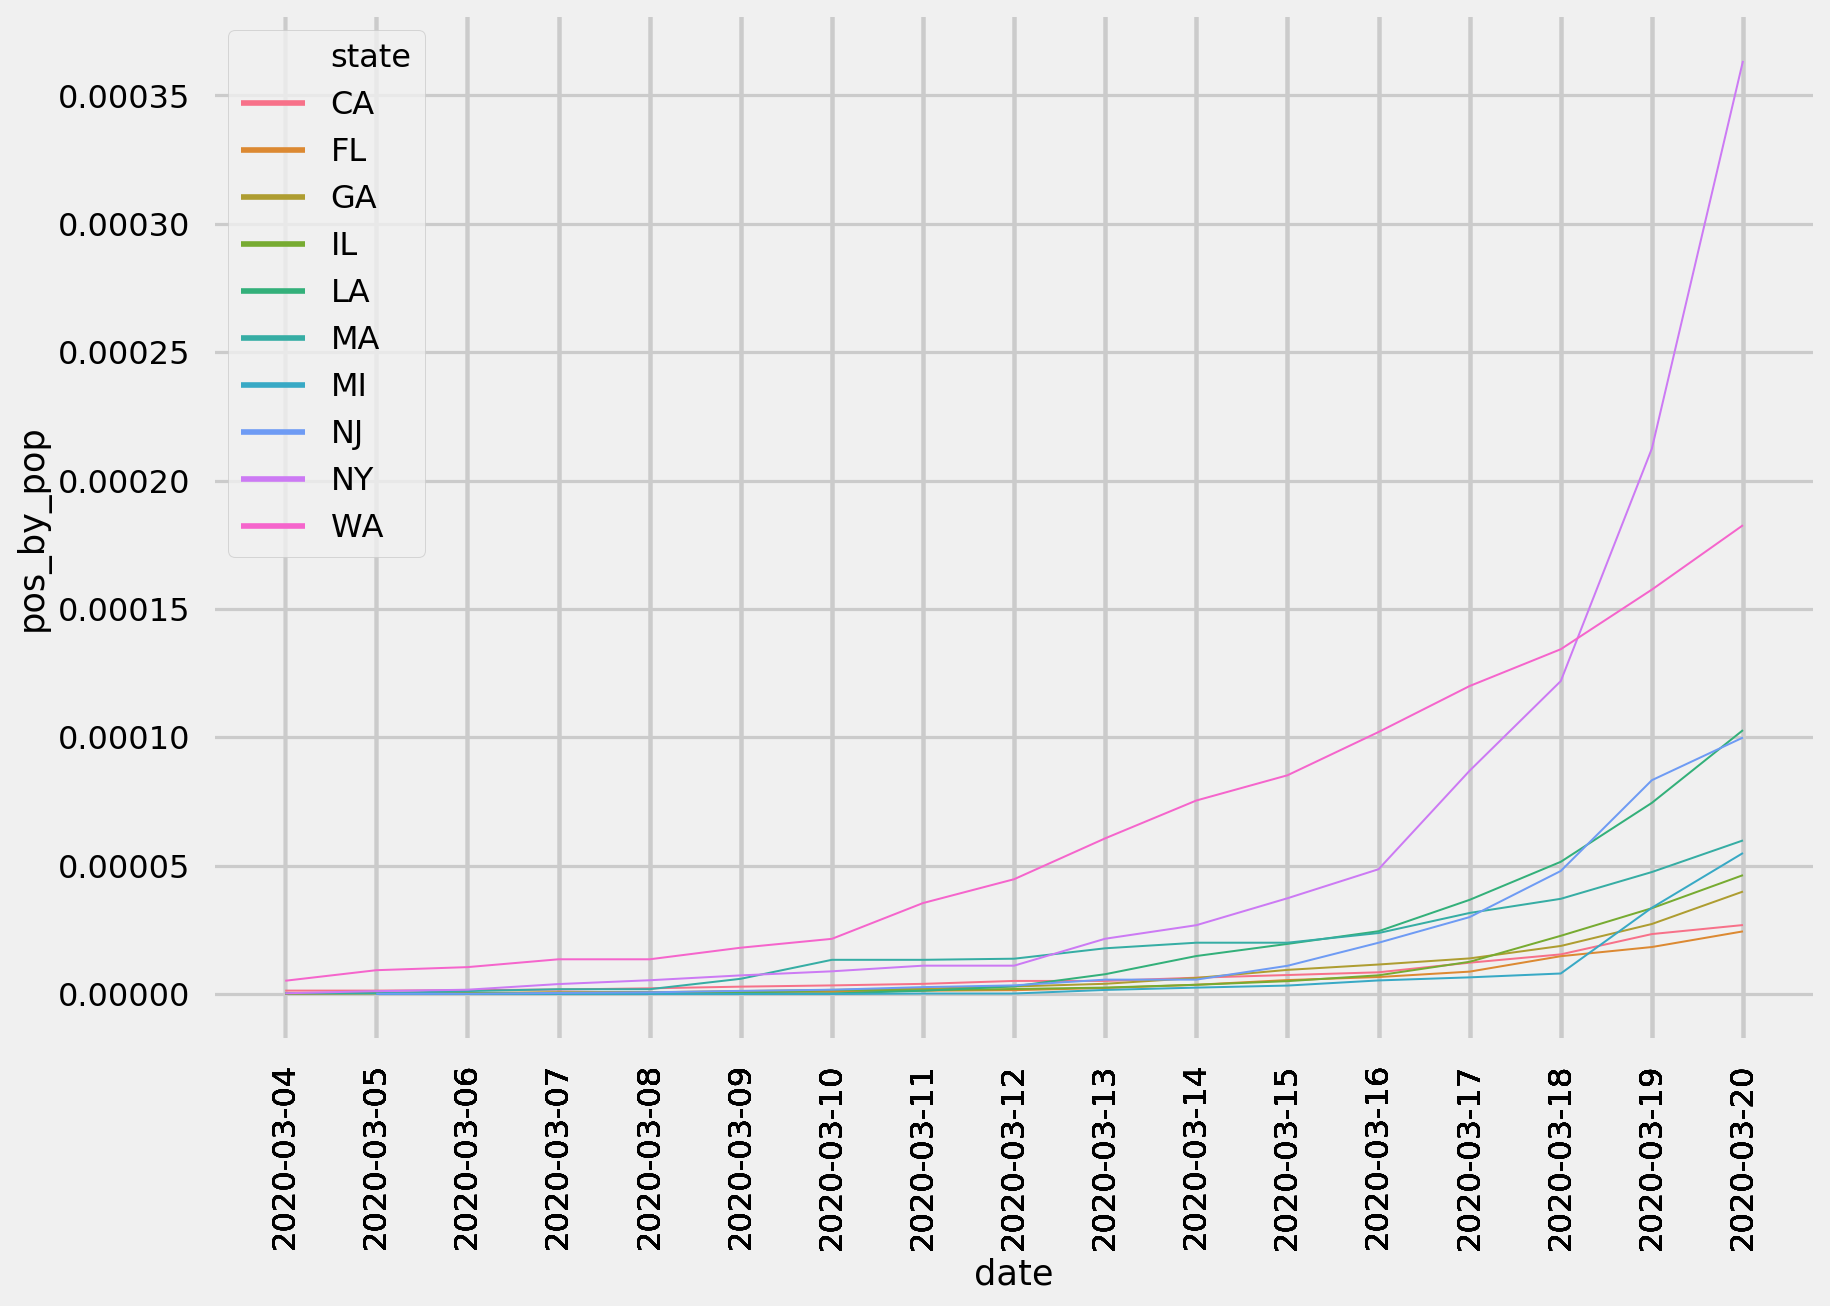

In [24]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

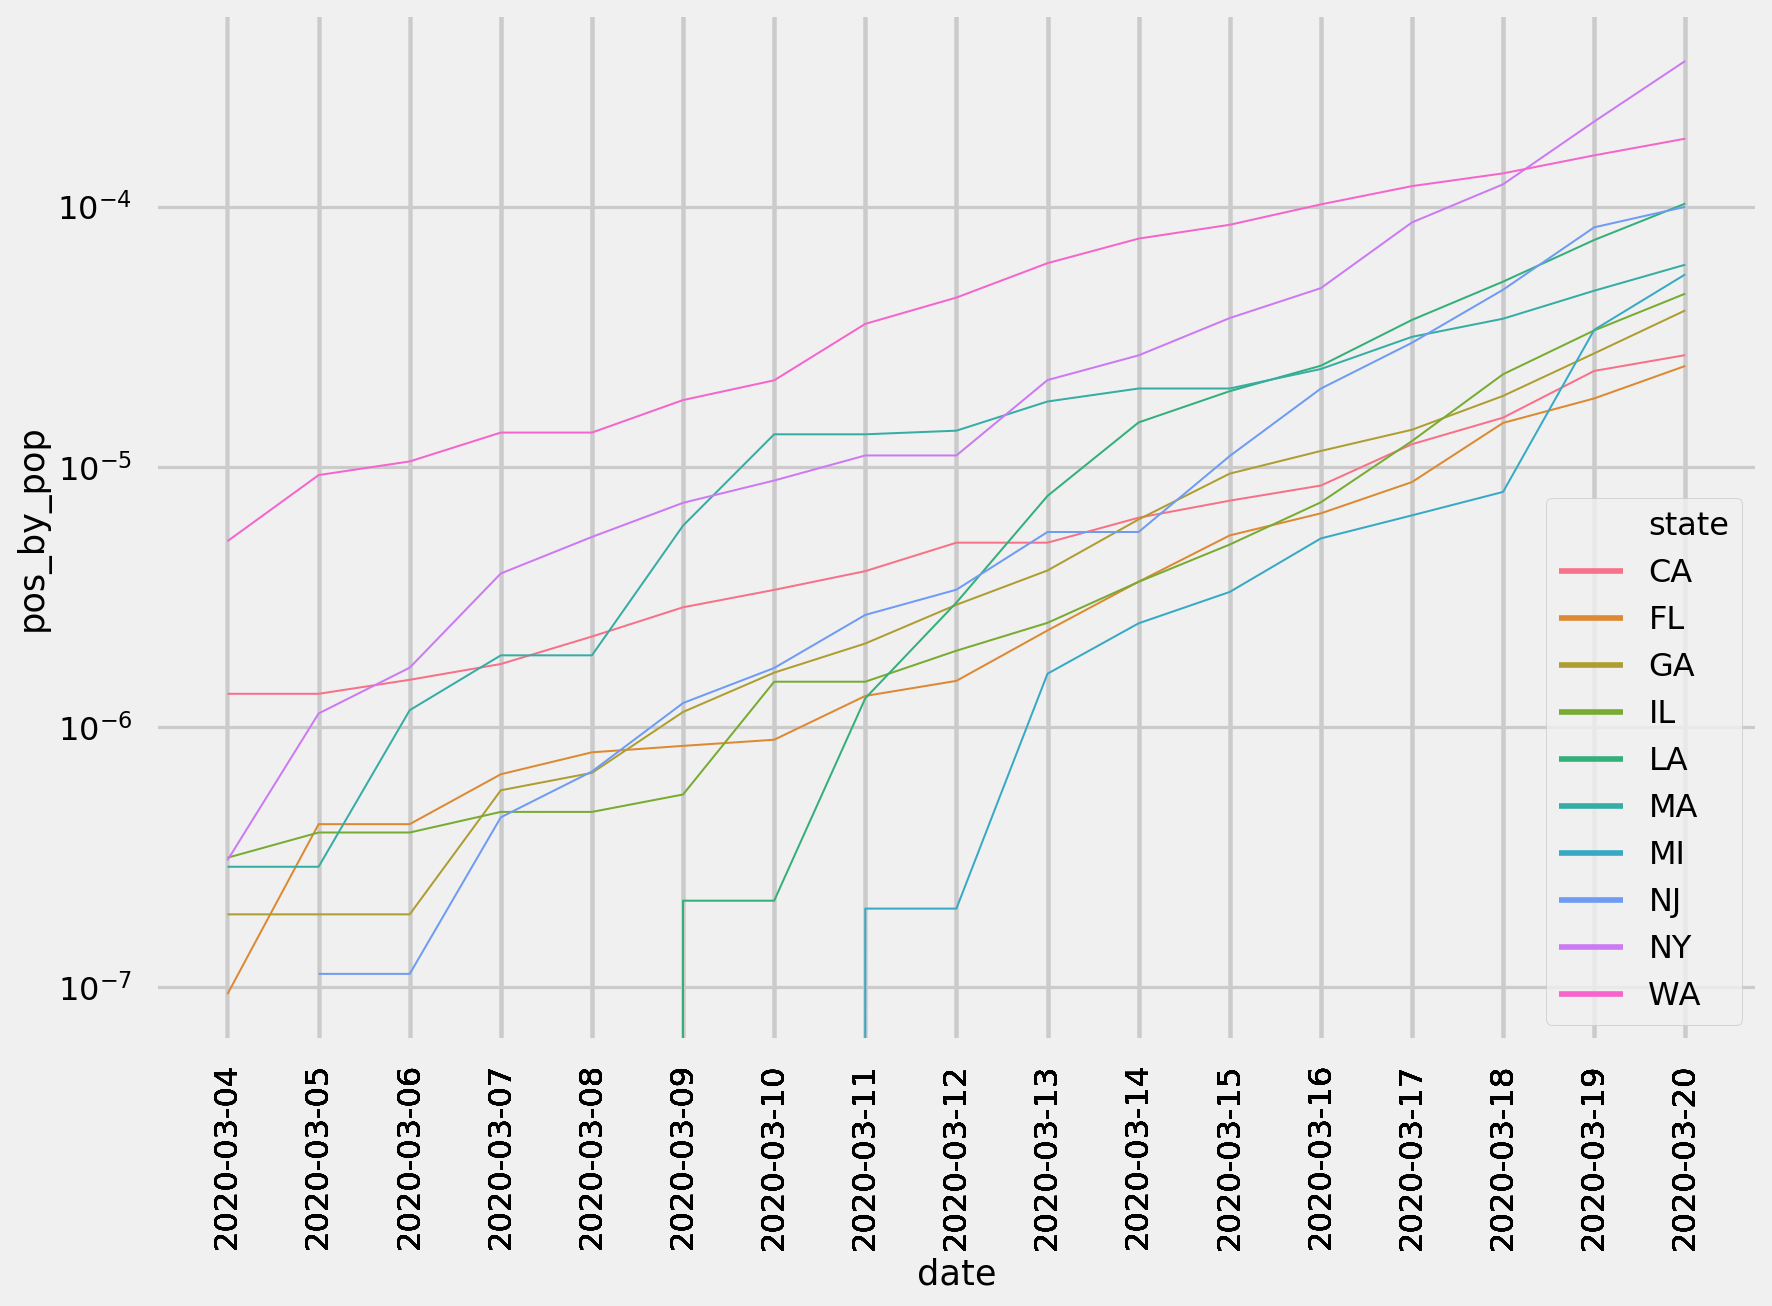

In [25]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()